<center> 
    <h1> Toronto Crime </h1>
<h3> Sprint 3</h3>
<h3> Final Model</h3>
    </center>

##### Author: Arsalan Arif Radhu
##### Date: 24 November 2023

### Table of Contents:
- [Introduction](#intro) <br />
- [Classification Report](#cr)<br />
- [Feature Importance](#fi)<br />
- [Confusion Matrix](#cm)<br />
- [Permutation Importance](#pi)<br />

### Introduction <a id="intro" /> 

After optimizing the models, I have decided to go ahead with the XGBoost model as it had the best Accuracy and decent distribution of the classification metrics.

In [21]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt
import numpy as np
#from pdpbox import pdp, info_plots,get_dataset
import matplotlib.pyplot as plt
from joblib import dump
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.inspection import permutation_importance

In [4]:
# Importing the data
df = pd.read_csv('../Data/FixedFinalDataAdvAn.csv', index_col=0)
df.reset_index(inplace=True)

In [5]:
df.head(10)

,index,OBJECTID,CRIME_TYPE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,OCC_YEAR,OCC_MONTH,OCC_DAY,LONG_WGS84,...,D55,NSA,Apartment,Commercial,Educational,House,NotApplicable,Other,Outside,Transit
0,0,1,0,2014,1,1,1998,6,1,-79.425896,...,0,0,1,0,0,0,0,0,0,0
1,1,2,0,2014,1,1,2014,1,1,-79.376497,...,0,0,1,0,0,0,0,0,0,0
2,2,3,0,2014,1,1,2014,1,1,-79.344839,...,1,0,0,0,0,0,0,0,1,0
3,3,4,0,2014,1,1,2014,1,1,-79.391841,...,0,0,0,1,0,0,0,0,0,0
4,4,5,0,2014,1,1,2014,1,1,-85.488744,...,0,1,0,0,0,0,0,0,1,0
5,5,6,0,2014,1,1,2014,1,1,-79.416594,...,0,0,0,1,0,0,0,0,0,0
6,6,7,0,2014,1,1,2014,1,1,-79.391279,...,0,0,0,1,0,0,0,0,0,0
7,7,8,0,2014,1,1,2014,1,1,-79.345795,...,0,0,0,1,0,0,0,0,0,0
8,8,9,0,2014,1,1,2014,1,1,-79.132919,...,0,0,0,0,0,0,0,0,0,1
9,9,10,0,2014,1,1,2014,1,1,-79.455586,...,0,0,1,0,0,0,0,0,0,0


As discussed in the previous notebook, I will be dropping all the indices.

In [6]:
df.drop('index', axis=1, inplace= True)
df.drop('OBJECTID', axis=1, inplace= True)

In [7]:
shuffled_df = df.sample(frac=1)

In [8]:
shuffled_df['CRIME_TYPE'].value_counts()

CRIME_TYPE
5    160284
0    158497
1     62423
3     26171
4      5707
2      1245
Name: count, dtype: int64

Category 0: Assault <br />
Category 1: Break and Enter <br />
Category 2: Homicide <br />
Category 3: Robbery <br />
Category 4: Shooting <br />
Category 5: Theft <br />

In [9]:
shuffled_df.head(10)

,CRIME_TYPE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,OCC_YEAR,OCC_MONTH,OCC_DAY,LONG_WGS84,LAT_WGS84,DEATH,...,D55,NSA,Apartment,Commercial,Educational,House,NotApplicable,Other,Outside,Transit
131648,0,2021,8,15,2021,8,15,-79.404796,43.652672,0,...,0,0,0,0,0,0,0,1,0,0
65097,0,2017,11,27,2017,11,27,-79.429066,43.661802,0,...,0,0,0,0,0,0,0,1,0,0
51451,0,2017,2,23,2017,2,23,-79.378146,43.654449,0,...,0,0,0,0,0,0,0,0,1,0
236079,5,2014,8,11,2014,8,10,-79.329715,43.806293,0,...,0,0,0,0,0,1,0,0,0,0
349353,5,2020,4,2,2020,3,31,-79.381492,43.670448,0,...,0,0,1,0,0,0,0,0,0,0
245168,5,2015,7,27,2015,7,16,-79.179867,43.756027,0,...,0,0,0,0,0,0,0,0,1,0
355239,1,2014,6,22,2014,6,22,-79.300122,43.737855,0,...,0,0,0,0,0,1,0,0,0,0
233496,5,2014,5,5,2014,5,4,-79.441508,43.774919,0,...,0,0,0,0,0,0,0,0,1,0
310949,5,2022,11,24,2022,11,23,-79.286090,43.782004,0,...,0,0,0,0,0,1,0,0,0,0
163281,5,2015,6,15,2015,6,14,-79.357408,43.656148,0,...,0,0,1,0,0,0,0,0,0,0


After many considerations I will be dropping the `Homicide` and `Shootings` categories as they are very rare cases and can be almost be treated as outliers and may be affecting the accuracy and scores of the model.

Using the best parameters we found in the `Optimization` notebook, I will re-run the model after dropping the two categories.

In [10]:
shuffled_df = shuffled_df[~shuffled_df['CRIME_TYPE'].isin([2, 4])]

In [11]:
shuffled_df['CRIME_TYPE'].value_counts()

CRIME_TYPE
5    160284
0    158497
1     62423
3     26171
Name: count, dtype: int64

In [12]:
shuffled_df['CRIME_TYPE'].replace({3: 2, 5: 3}, inplace=True)

After changing:<br /> 
Category 0: Assault <br />
Category 1: Break and Enter <br />
Category 2: Robbery <br />
Category 3: Theft <br />


In [13]:
# Extract features and labels
X_boost = shuffled_df.drop('CRIME_TYPE', axis=1)  # Replace 'label_column' with the actual label column name
y_boost = shuffled_df['CRIME_TYPE']

X_train, X_test, y_train, y_test = train_test_split(X_boost, y_boost, test_size=0.3, random_state=12)

# Set the specified parameters for multi-class classification
num_classes = len(np.unique(y_train))
xgb_params = {
    'learning_rate': 0.1,
    'max_depth': 10,
    'min_child_weight': 8,
    'n_estimators': 625,
    'objective': 'multi:softprob',
    'num_class': num_classes,
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(**xgb_params)  # You can adjust the number of estimators

# Train the model
xgb_model.fit(
    X_train, y_train,
    eval_metric='merror', 
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=10
)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

c:\Users\arifh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\arifh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-merror:0.43642
[1]	validation_0-merror:0.43448
[2]	validation_0-merror:0.43333
[3]	validation_0-merror:0.43314
[4]	validation_0-merror:0.43297
[5]	validation_0-merror:0.43172
[6]	validation_0-merror:0.43112
[7]	validation_0-merror:0.43031
[8]	validation_0-merror:0.42971
[9]	validation_0-merror:0.42919
[10]	validation_0-merror:0.42840
[11]	validation_0-merror:0.42837
[12]	validation_0-merror:0.42756
[13]	validation_0-merror:0.42726
[14]	validation_0-merror:0.42680
[15]	validation_0-merror:0.42638
[16]	validation_0-merror:0.42597
[17]	validation_0-merror:0.42528
[18]	validation_0-merror:0.42467
[19]	validation_0-merror:0.42420
[20]	validation_0-merror:0.42371
[21]	validation_0-merror:0.42334
[22]	validation_0-merror:0.42302
[23]	validation_0-merror:0.42235
[24]	validation_0-merror:0.42158
[25]	validation_0-merror:0.42105
[26]	validation_0-merror:0.41994
[27]	validation_0-merror:0.41885
[28]	validation_0-merror:0.41821
[29]	validation_0-merror:0.41684
[30]	validation_0-me

### Classification Report <a id="cr" /> 


The classification report is my go-to tool for understanding how well my classification model is performing. It's like having a detailed report card that breaks down the model's accuracy, precision, recall, and F1-score for each class. This helps me strike a balance between minimizing false positives and ensuring I capture all relevant instances. By examining these metrics, I can identify which classes the model predicts well and where it might struggle. This insight is invaluable for fine-tuning the model, comparing different models, and making informed decisions to enhance overall performance. It's a key ally in my journey to build a more effective and reliable classification model.

In [14]:
# Display the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.6405210574979748
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.75      0.68     47607
           1       0.50      0.33      0.40     18667
           2       0.48      0.06      0.11      7718
           3       0.69      0.74      0.72     48221

    accuracy                           0.64    122213
   macro avg       0.57      0.47      0.48    122213
weighted avg       0.62      0.64      0.62    122213



The model performs well in predicting Category 0 i.e., Assault (precision, recall, and F1-score around 0.68) and Category 3 i.e., Theft (precision, recall, and F1-score around 0.72).<br />
However, it struggles with Category 2 i.e., Robbery, where recall is particularly low (6%), indicating difficulty in correctly identifying instances of this category.<br />
The overall accuracy is 64.05%, but it's important to consider individual category performance for a more detailed understanding.<br />
Macro and weighted averages provide additional insights, especially highlighting the challenges in predicting Category 2 i.e., Robbery, which has a lower prevalence and recall.

In [15]:
# Save the model to a file using joblib
dump(xgb_model, 'xgb_model.joblib')

### Feature Importance <a id="fi" /> 

Understanding feature importance in XGBoost is essential for my model's efficacy. It reveals which features influence predictions the most, aiding in focused feature selection, reducing overfitting, and enhancing efficiency. This insight facilitates model interpretation, providing a clearer understanding of decision-making. If the model underperforms, feature importance analysis helps diagnose issues, guiding improvements in feature engineering and data preprocessing. Ultimately, leveraging feature importance empowers me to optimize the model's performance, ensuring it makes accurate and impactful predictions across diverse applications.

Top 20 Features and Importances:


Outside: 0.25517594814300537
Transit: 0.133722722530365
House: 0.0926656574010849
Apartment: 0.0880265161395073
Other: 0.057442065328359604
Educational: 0.03225960209965706
Commercial: 0.028147762641310692
D52: 0.023244813084602356
NSA: 0.021296219900250435
D53: 0.019270548596978188
D23: 0.01885422319173813
REPORT_DAY: 0.018589211627840996
OCC_DAY: 0.01825357787311077
D32: 0.015610666014254093
D31: 0.01280453521758318
D22: 0.012693221680819988
D43: 0.012363376095890999
D51: 0.011071240529417992
LONG_WGS84: 0.010675208643078804
D33: 0.010548554360866547


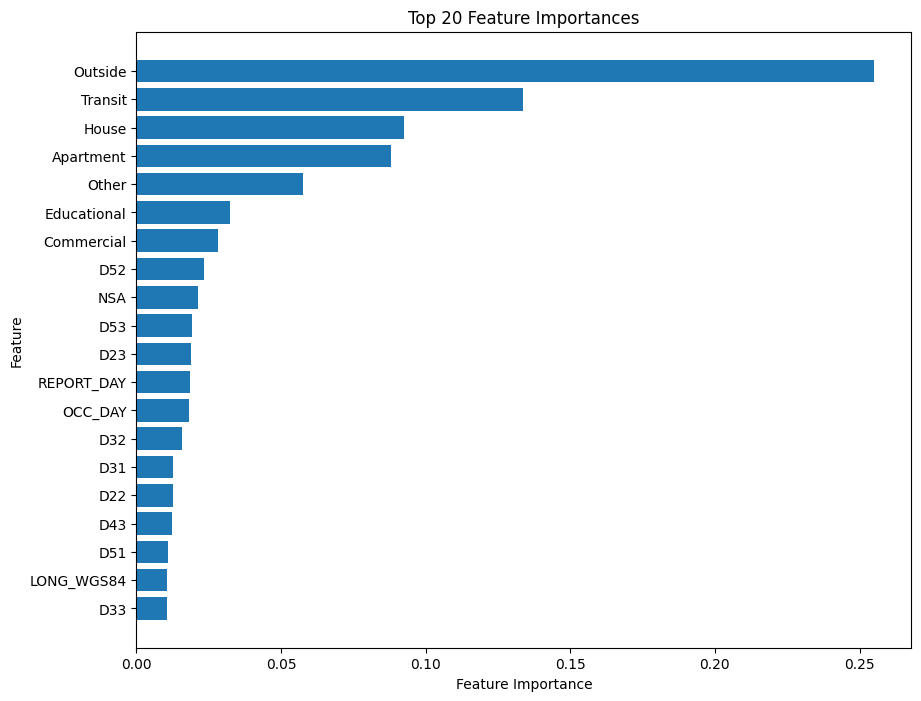

In [16]:

# Get feature importances
feature_importances = xgb_model.feature_importances_
# Get the indices of the top 20 features
top20_indices = np.argsort(feature_importances)[-20:]
# Get the names of the top 20 features
top20_features = X_train.columns[top20_indices]
# Print top 20 features and their importances
print("Top 20 Features and Importances:")
for feature, importance in zip(top20_features[::-1], feature_importances[top20_indices][::-1]):
    print(f'{feature}: {importance}')
# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(top20_features)), feature_importances[top20_indices], align='center')
plt.yticks(range(len(top20_features)), top20_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.show()

The model places the highest importance on incidents occurring outside, transit-related events, and those in residential areas and apartments.<br />
Geographic regions (D52, NSA, D53) are also influential in predicting crime categories.<br />
Time-related features such as REPORT_DAY and OCC_DAY play a role in the model's decision-making.<br />
The importance values provide insights into which features have the most significant impact on the model's ability to classify crime types. These insights can guide further investigation and potentially help improve the model's performance through feature engineering or refinement.

### Confusion Matrix <a id="cm" /> 

A confusion matrix helps my model by breaking down its predictions into different categories: true positives, true negatives, false positives, and false negatives. This breakdown allows me to calculate important metrics like accuracy, precision, recall, and F1 score. It gives me a detailed understanding of where my model performs well and where it struggles. By identifying specific types of errors, such as misclassifications, I can fine-tune and improve my model. The confusion matrix is like a diagnostic tool, guiding me in optimizing my model's predictive capabilities and ensuring it reliably distinguishes between different classes.

[[35743  2766   288  8810]
 [ 7443  6167    57  5000]
 [ 4492   674   464  2088]
 [ 9467  2682   166 35906]]


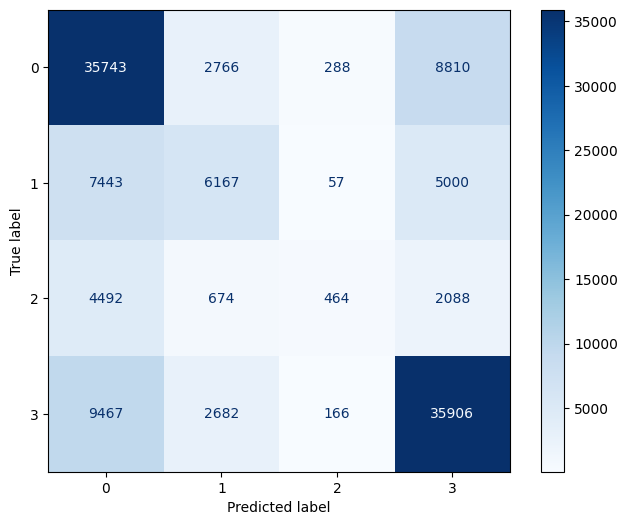

In [20]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

# Plot the confusion matrix with a specific color map
fig, ax = plt.subplots(figsize=(8, 6))
display = ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, ax=ax, cmap='Blues') 

<b>Assault (Category 0)</b>:<br />

The model correctly identified a substantial number of Assault cases (35,743), but also had a notable number of false positives (2,766) and false negatives (8,288). This suggests challenges in distinguishing Assault from other categories.<br /><br />

<b>Break and Enter (Category 1)</b>:<br />

The model achieved moderate success in predicting Break and Enter cases (6,167), but also made a significant number of false positive (7,500) and false negative (7,443) errors. Further refinement may be needed for accurate predictions in this category.
<br /><br />

<b>Robbery (Category 2)</b>:<br />

Predicting Robbery proved to be more challenging for the model, with a relatively low number of true positives (464) and a substantial number of false positives (6,166) and false negatives (5,226). This indicates room for improvement in distinguishing Robbery cases.

<br /><br />
<b>Theft (Category 3)</b>:<br />

The model excelled in identifying Theft cases (35,906), with a high number of true positives. However, it still had a notable number of false positives (2,848) and false negatives (12,315), suggesting some difficulty in distinguishing Theft from other categories.

<br /><br />
In summary, while the model demonstrated strong performance in certain categories, there is room for improvement, especially in distinguishing between closely related categories like Assault and Break and Enter. Further model tuning, feature engineering, or exploring alternative algorithms may enhance its overall accuracy and reliability. Understanding these nuances is crucial for refining the model's predictions and optimizing its performance in real-world crime classification scenarios.

### Permutation Importance <a id="pi" /> 


Permutation importance is crucial for my model as it gauges the impact of each feature on its performance. I calculate scores by shuffling the values of a single feature and noting how it influences the model's performance metrics like accuracy and F1-score. A higher permutation importance score signals that a feature plays a more pivotal role in my model's predictions. This insight guides me in understanding which features significantly contribute to the model's effectiveness, empowering me to prioritize and optimize those features for a more robust and accurate predictive outcome.

In [35]:
# Compute permutation feature importance
result = permutation_importance(xgb_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Display the importance scores
print(result.importances_mean)

[0.02538355 0.02266289 0.08922373 0.02730724 0.02243051 0.0920164
 0.05779582 0.05936766 0.         0.         0.00066769 0.00037394
 0.00055968 0.00078715 0.00031748 0.00060305 0.00049258 0.00145075
 0.00147857 0.00032157 0.0002602  0.0002422  0.00059323 0.00106944
 0.00174859 0.00047458 0.00168558 0.01355011 0.01251176 0.00504529
 0.0225287  0.         0.00762848 0.0470531  0.00635202]
<built-in method keys of Bunch object at 0x000001C5449D90D0>


In [25]:
# Assuming you have the array of permutation importance scores
permutation_importance_scores = np.array([0.02538355, 0.02266289, 0.08922373, 0.02730724, 0.02243051, 0.0920164,
                                          0.05779582, 0.05936766, 0.0, 0.0, 0.00066769, 0.00037394,
                                          0.00055968, 0.00078715, 0.00031748, 0.00060305, 0.00049258,
                                          0.00145075, 0.00147857, 0.00032157, 0.0002602, 0.0002422,
                                          0.00059323, 0.00106944, 0.00174859, 0.00047458, 0.00168558,
                                          0.01355011, 0.01251176, 0.00504529, 0.0225287, 0.0, 0.00762848,
                                          0.0470531, 0.00635202])

# Assuming you have the list of feature names
feature_names = tuple(X_train.columns)

# Create a dictionary to associate feature names with their permutation importance scores
feature_importance_dict = dict(zip(feature_names, permutation_importance_scores))

# Sort the features based on their permutation importance scores (descending order)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print sorted features
print("Permutation Importance Scores:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")


Permutation Importance Scores:
OCC_DAY: 0.0920164
REPORT_DAY: 0.08922373
LAT_WGS84: 0.05936766
LONG_WGS84: 0.05779582
Outside: 0.0470531
OCC_YEAR: 0.02730724
REPORT_YEAR: 0.02538355
REPORT_MONTH: 0.02266289
House: 0.0225287
OCC_MONTH: 0.02243051
Apartment: 0.01355011
Commercial: 0.01251176
Other: 0.00762848
Transit: 0.00635202
Educational: 0.00504529
D53: 0.00174859
NSA: 0.00168558
D33: 0.00147857
D32: 0.00145075
D52: 0.00106944
D14: 0.00078715
D11: 0.00066769
D23: 0.00060305
D51: 0.00059323
D13: 0.00055968
D31: 0.00049258
D55: 0.00047458
D12: 0.00037394
D41: 0.00032157
D22: 0.00031748
D42: 0.0002602
D43: 0.0002422
DEATH: 0.0
INJURIES: 0.0
NotApplicable: 0.0


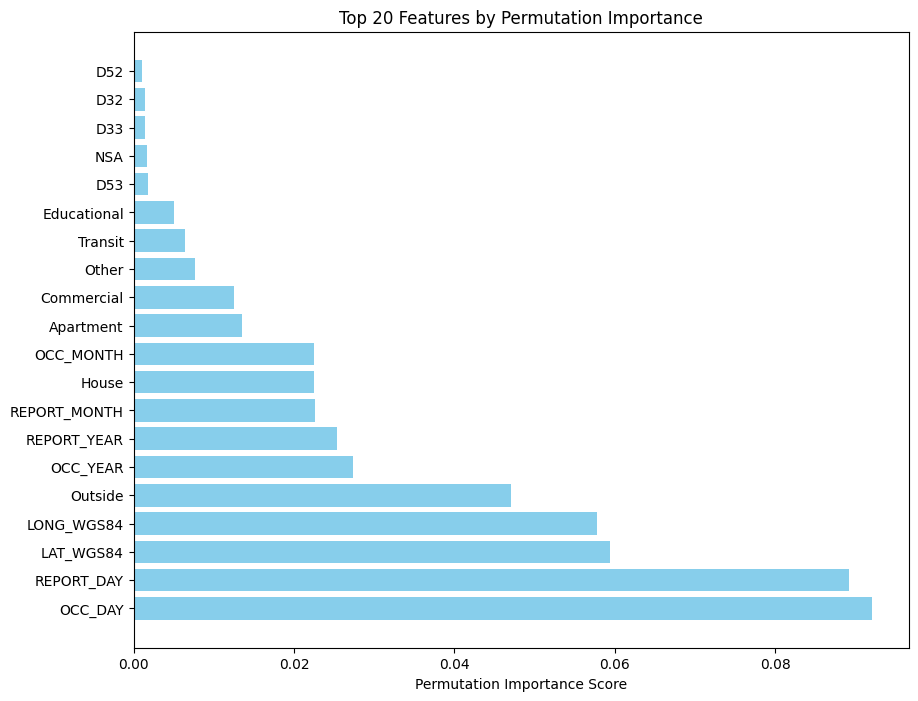

In [27]:
# Plotting only the top 20 features
top_features = sorted_feature_importance[:20]

plt.figure(figsize=(10, 8))
plt.barh([x[0] for x in top_features], [x[1] for x in top_features], color='skyblue')
plt.xlabel('Permutation Importance Score')
plt.title('Top 20 Features by Permutation Importance')
plt.show()


These insights suggest that features related to the day of occurrence and reporting, location coordinates, and types of places (e.g., "Outside," "House," "Apartment") have a significant impact on the model's predictions. On the other hand, certain features, such as specific event types (e.g., "DEATH," "INJURIES"), seem to have minimal impact based on permutation importance.

<b>Highly Important Features (e.g., OCC_DAY, REPORT_DAY):</b><br />

These features have a substantial impact on the model's predictions. Permuting the values of these features leads to a significant decrease in model performance, indicating their crucial role in predicting crime types.<br /><br />
<b>Moderately Important Features (e.g., OCC_YEAR, REPORT_YEAR, REPORT_MONTH):</b><br />

These features contribute to the model's predictive power, but to a lesser extent than the highly important features. Permuting these features results in a noticeable but not drastic decrease in model performance.<br /><br />
<b>Less Important Features (e.g., Apartment, Commercial, Other):</b><br />

These features still have some impact on the model, but permuting their values has a relatively smaller effect on model performance compared to more important features.<br /><br />
<b>Features with Minimal Impact (e.g., DEATH, INJURIES, NotApplicable):</b><br />

Permuting the values of these features does not significantly affect the model's performance. It suggests that these features might not contribute much to distinguishing between different crime types in the given context.